In [ ]:
%pip install wordcloud

In [72]:
import sqlite3
import functools
import nltk.corpus
import pandas as pd
from collections import Counter
from nltk.tokenize import RegexpTokenizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [73]:
def db_connect(path_db):
    db = sqlite3.connect(path_db)
    cursor = db.cursor()
    
    return db, cursor

In [84]:
sql = '''
select text
from verse
inner join book 
on verse.book_id = book.book_reference_id
where book.name like 'Filipenses'
'''

In [85]:
db, cursor = db_connect('NAA.sqlite')
verses = pd.read_sql(sql, db)

In [86]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(['pois','porque','de','porém','uns','eis',\
                  'si','sim','cada','onde','ninguém','deu',\
                  'mim','ainda','assim','quanto','tão','estar',\
                  'certo',''])

def filter_stopwords(x):
    if x not in stopwords:
        return True
    return False

def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z



tokenizer = RegexpTokenizer(r'\w+')

verses['text'] = verses['text'].apply(lambda x: x.lower())
verses['text'] = verses['text'].apply(lambda x: tokenizer.tokenize(x))
verses['text'] = verses['text'].apply(lambda x: list(filter(filter_stopwords,x)))

verses['new_verse'] = verses['text'].apply(lambda x: ' '.join(x))
verses['count'] = verses['text'].apply(lambda x: Counter(x))
verses

,text,new_verse,count
0,"[paulo, timóteo, servos, cristo, jesus, todos,...",paulo timóteo servos cristo jesus todos santos...,"{'paulo': 1, 'timóteo': 1, 'servos': 1, 'crist..."
1,"[graça, paz, deus, pai, senhor, jesus, cristo]",graça paz deus pai senhor jesus cristo,"{'graça': 1, 'paz': 1, 'deus': 1, 'pai': 1, 's..."
2,"[dou, graças, deus, tudo, lembro]",dou graças deus tudo lembro,"{'dou': 1, 'graças': 1, 'deus': 1, 'tudo': 1, ..."
3,"[fazendo, sempre, alegria, súplicas, todos, to...",fazendo sempre alegria súplicas todos todas or...,"{'fazendo': 1, 'sempre': 1, 'alegria': 1, 'súp..."
4,"[dou, graças, maneira, têm, participado, procl...",dou graças maneira têm participado proclamação...,"{'dou': 1, 'graças': 1, 'maneira': 1, 'têm': 1..."
5,"[começou, boa, obra, completá, la, dia, cristo...",começou boa obra completá la dia cristo jesus,"{'começou': 1, 'boa': 1, 'obra': 1, 'completá'..."
6,"[aliás, justo, pense, todos, trago, coração, a...",aliás justo pense todos trago coração algemas ...,"{'aliás': 1, 'justo': 1, 'pense': 1, 'todos': ..."
7,"[deus, testemunha, saudade, todos, profundo, a...",deus testemunha saudade todos profundo afeto c...,"{'deus': 1, 'testemunha': 1, 'saudade': 1, 'to..."
8,"[faço, oração, amor, aumente, conhecimento, to...",faço oração amor aumente conhecimento toda per...,"{'faço': 1, 'oração': 1, 'amor': 1, 'aumente':..."
9,"[aprovem, coisas, excelentes, sinceros, inculp...",aprovem coisas excelentes sinceros inculpáveis...,"{'aprovem': 1, 'coisas': 1, 'excelentes': 1, '..."


In [87]:
words_count = functools.reduce(lambda a,b : merge_two_dicts(a,b),verses['count'].values)
{k: v for k, v in sorted(words_count.items(), key=lambda item: item[1])}

{'paulo': 1,
 'timóteo': 1,
 'servos': 1,
 'santos': 1,
 'inclusive': 1,
 'bispos': 1,
 'diáconos': 1,
 'vivem': 1,
 'filipos': 1,
 'paz': 1,
 'pai': 1,
 'lembro': 1,
 'fazendo': 1,
 'súplicas': 1,
 'todas': 1,
 'orações': 1,
 'participado': 1,
 'proclamação': 1,
 'desde': 1,
 'primeiro': 1,
 'começou': 1,
 'obra': 1,
 'completá': 1,
 'la': 1,
 'aliás': 1,
 'justo': 1,
 'pense': 1,
 'trago': 1,
 'coração': 1,
 'confirmação': 1,
 'participantes': 1,
 'comigo': 1,
 'testemunha': 1,
 'saudade': 1,
 'profundo': 1,
 'afeto': 1,
 'faço': 1,
 'oração': 1,
 'aumente': 1,
 'conhecimento': 1,
 'percepção': 1,
 'aprovem': 1,
 'excelentes': 1,
 'sinceros': 1,
 'inculpáveis': 1,
 'cheios': 1,
 'fruto': 1,
 'justiça': 1,
 'vem': 1,
 'glória': 1,
 'louvor': 1,
 'quero': 1,
 'saibam': 1,
 'aconteceram': 1,
 'contribuído': 1,
 'progresso': 1,
 'guarda': 1,
 'pretoriana': 1,
 'demais': 1,
 'sabem': 1,
 'preso': 1,
 'maioria': 1,
 'estimulados': 1,
 'ousam': 1,
 'falar': 1,
 'palavra': 1,
 'coragem': 1,


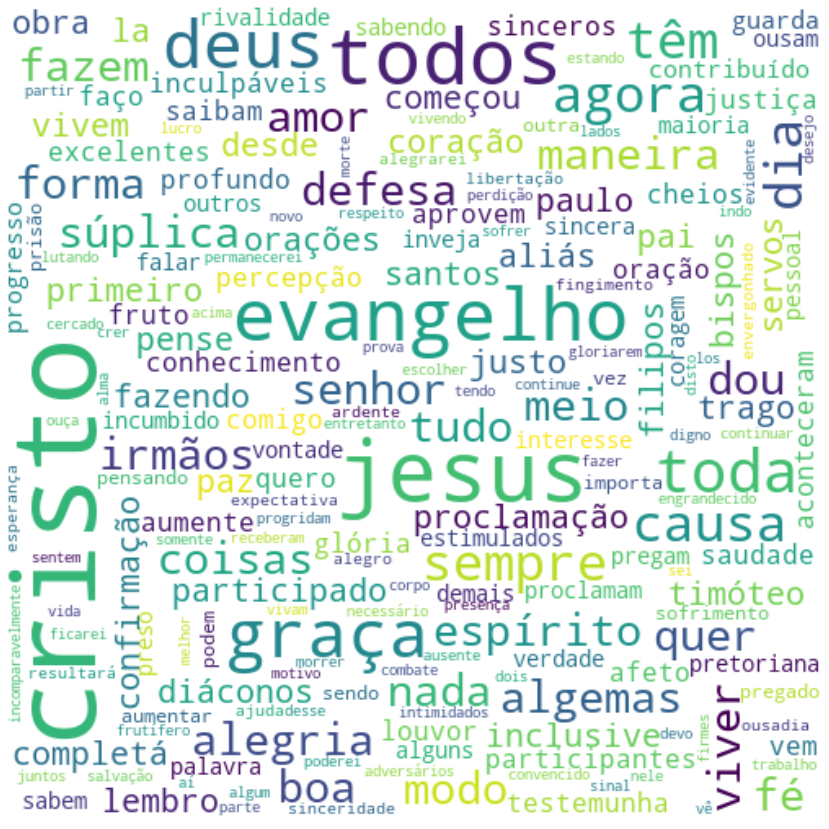

In [88]:
text = ' '.join(verses['new_verse'])
plt.figure(figsize=(15,15))
wordcloud = WordCloud(
    width=500,
    height = 500,
    max_font_size=70, 
    max_words=200, 
    background_color="white"
).generate(text)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()